# Running basic phi calculation from pyphi

In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
import pandas as pd

import pyphi.data_models as dm  # Prototype code
from pyphi.zap_tc import Zaptc
from pyphi.convert import sbs2sbn, sbn2sbs      

In [2]:
>>> import pyphi
>>> import numpy as np
>>> tpm = np.array([
...     [0, 0, 0],
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 0, 0],
...     [1, 1, 0],
...     [1, 1, 1],
...     [1, 1, 1],
...     [1, 1, 0]
... ])
>>> cm = np.array([
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 1, 0]
... ])
>>> labels = ('A', 'B', 'C')
>>> network = pyphi.Network(tpm, cm=cm, node_labels=labels)
>>> state = (1, 0, 0)
# state = (0, 1, 0)  # ERROR
>>> node_indices = (0, 1, 2)
>>> subsystem = pyphi.Subsystem(network, state, node_indices)

>>> pyphi.compute.phi(subsystem) # => 2.3125

2.3125

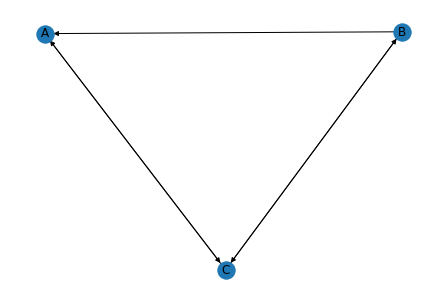

In [3]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn = dm.Gnet(g, tpm).draw()

In [4]:
gn.tpm

,A,B,C
000,0,0,0
001,0,0,1
010,1,0,1
011,1,0,0
100,1,1,0
101,1,1,1
110,1,1,1
111,1,1,0


In [5]:
gn.tpm.to_numpy()

array([[0, 0, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0]])

Computing concepts:   0%|                                | 0/7 [00:00<?, ?it/s]

Using state=(1, 0, 0)


2.3125

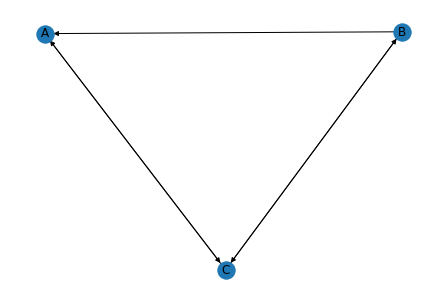

In [6]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn = dm.Gnet(g, tpm).draw()
gn.phi(state=(1,0,0))

Zap node: A state: ...11..
Zap node: B state: 1111...
Zap node: C state: 1...11.
Zap node: D state: ....11.
Zap node: E state: 111111.
Zap node: F state: 1.1111.
Zap node: G state: 11111.1
                0         1         2         3         4         5         6
0000000  0.138474  0.130357  0.149838  0.149188  0.148214  0.144968  0.138961
0000001  0.092730  0.092393  0.110061  0.104096  0.106910  0.109836  0.383975
0000010  0.109865  0.098963  0.113357  0.101715  0.099598  0.380504  0.095999
0000011  0.083235  0.079960  0.084999  0.081304  0.074500  0.297077  0.298925
0000100  0.108532  0.096375  0.109859  0.110190  0.378095  0.100354  0.096596
...           ...       ...       ...       ...       ...       ...       ...
1111011  0.162800  0.156247  0.163806  0.160603  0.044312  0.157997  0.154236
1111100  0.179421  0.178226  0.180231  0.183122  0.180153  0.048653  0.050195
1111101  0.162370  0.158817  0.165963  0.159015  0.157949  0.042320  0.153567
1111110  0.157817  0.157682  0.

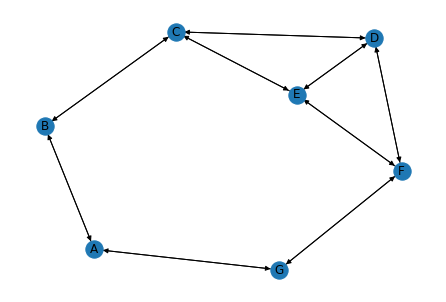

In [7]:
p = 7  # myst be prime
g = nx.DiGraph(nx.chordal_cycle_graph(p)) # an Expander graph
gn = dm.Gnet(g).draw()  # RANDOM tpm
gn.discover_tpm()
print(gn.tpm)

In [8]:
type(g)

networkx.classes.digraph.DiGraph

In [9]:
nx.to_numpy_array(gn.graph)

array([[1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.]])

In [ ]:
gn.phi()

Computing concepts:   0%|                              | 0/127 [00:00<?, ?it/s]

Using state=[0, 0, 0, 0, 0, 0, 0]


Computing concepts:  65%|█████████████▋       | 83/127 [00:52<00:58,  1.32s/it]

In [ ]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn = dm.Gnet(g).draw()  # RANDOM tpm
print(gn.tpm)
gn.phi()

In [ ]:
dd = dict((l,i) for (i,l) in enumerate(gn.graph.nodes))
edges = [(dd[u],dd[v]) for (u,v) in gn.graph.edges()]

ztc = Zaptc(net=dm.Net(edges=edges))
T = 10 # time steps
ztc.zapall(T)
gn.tpm = ztc.tpm_sbn

In [ ]:
gn.tpm

In [ ]:
gn.phi()